# Traditional machine learning

In [11]:
# Install opencv library
#!pip3 install opencv-python
#!pip3 install opencv-contrib-python

  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/32/9e/4dcc0bb70e3b365dc85b8f96c63e6a306653f7cc6ed061aa6cc7b2bddee7/opencv_contrib_python-4.8.1.78-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 MB 4.3 MB/s eta 0:00:00m eta 0:00:010:00:01


In [12]:
import cv2 as cv
import glob
import matplotlib.pyplot as plt

In [3]:
file = '/home/hduser/Desktop/data/traditional-machine-learning/*.jpg' 
glob.glob(file)
# Using List Comprehension to read all images
images = [cv.imread(image) for image in glob.glob(file)]

In [4]:
# for img in glob.glob("/home/hduser/Desktop/data/traditional-machine-learning/*.jpg"):
#     cv_img = cv.imread(img)
#images = [cv.imread(file) for file in glob.glob('/home/hduser/Desktop/data/traditional-machine-learning/*.jpg')]
#img = cv.imread("/home/hduser/Desktop/data/traditional-machine-learning/bombus hortorum male 1.jpg")

In [5]:
print(type(images))
print(len(images))

<class 'list'>
150


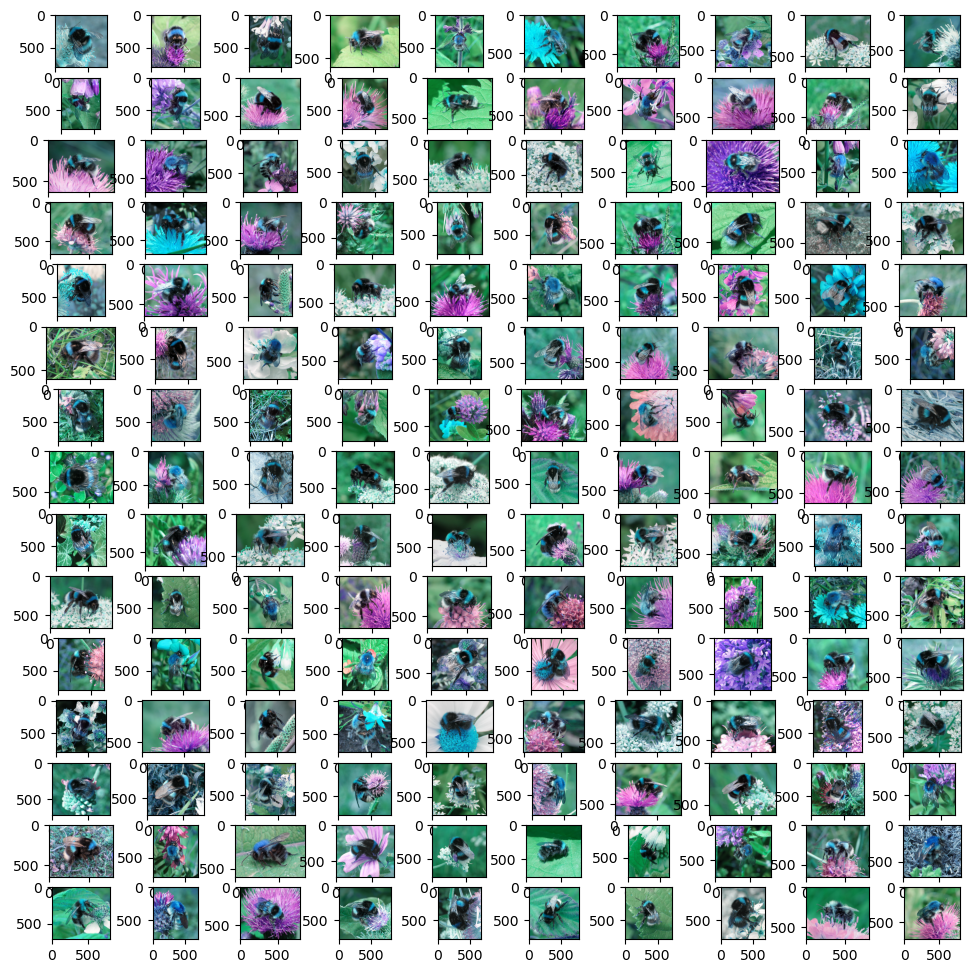

In [6]:
# Define size of the figure
fig=plt.figure(figsize=(12, 12))

# Define row and cols in the figure
rows, cols = 15, 10

# Display all images
for i in range(0, len(images), rows*cols):
    for j in range(0, cols*rows):
        fig.add_subplot(rows, cols, j+1)
        plt.imshow(images[i+j])
    plt.show()

In [13]:
def gen_sift_features(image):
    sift = cv.SIFT_create()
    # kp is the keypoints
    # desc is the SIFT descriptors, they're 128-dimensional vectors
    # that we can use for our final features
    kp, desc = sift.detectAndCompute(image, None)
    return kp, desc

# def show_sift_features(image, kp):
#     return plt.imshow(cv.drawKeypoints(image, kp))

In [18]:
def show_sift_features(image, kp):
    # Create a copy of the input image to draw the keypoints on
    img_with_keypoints = image.copy()
    
    # Draw the keypoints on the copy of the image
    cv.drawKeypoints(image, kp, img_with_keypoints)
    
    # Display the image with keypoints
    fig=plt.figure(figsize=(16, 16))
    plt.imshow(cv.cvtColor(img_with_keypoints, cv.COLOR_BGR2RGB))
    plt.show()

In [8]:
img_file = '/home/hduser/Desktop/data/traditional-machine-learning/bombus hortorum male 1.jpg'
img = cv.imread(img_file)
cv.imshow('images', img)
cv.waitKey(3000)
cv.destroyAllWindows()

QObject::moveToThread: Current thread (0x213fc9c0) is not the object's thread (0x2149f090).
Cannot move to target thread (0x213fc9c0)

QObject::moveToThread: Current thread (0x213fc9c0) is not the object's thread (0x2149f090).
Cannot move to target thread (0x213fc9c0)

QObject::moveToThread: Current thread (0x213fc9c0) is not the object's thread (0x2149f090).
Cannot move to target thread (0x213fc9c0)

QObject::moveToThread: Current thread (0x213fc9c0) is not the object's thread (0x2149f090).
Cannot move to target thread (0x213fc9c0)

QObject::moveToThread: Current thread (0x213fc9c0) is not the object's thread (0x2149f090).
Cannot move to target thread (0x213fc9c0)

QObject::moveToThread: Current thread (0x213fc9c0) is not the object's thread (0x2149f090).
Cannot move to target thread (0x213fc9c0)

QObject::moveToThread: Current thread (0x213fc9c0) is not the object's thread (0x2149f090).
Cannot move to target thread (0x213fc9c0)

QObject::moveToThread: Current thread (0x213fc9c0) is n

In [14]:
img_kp, img_desc = gen_sift_features(img)

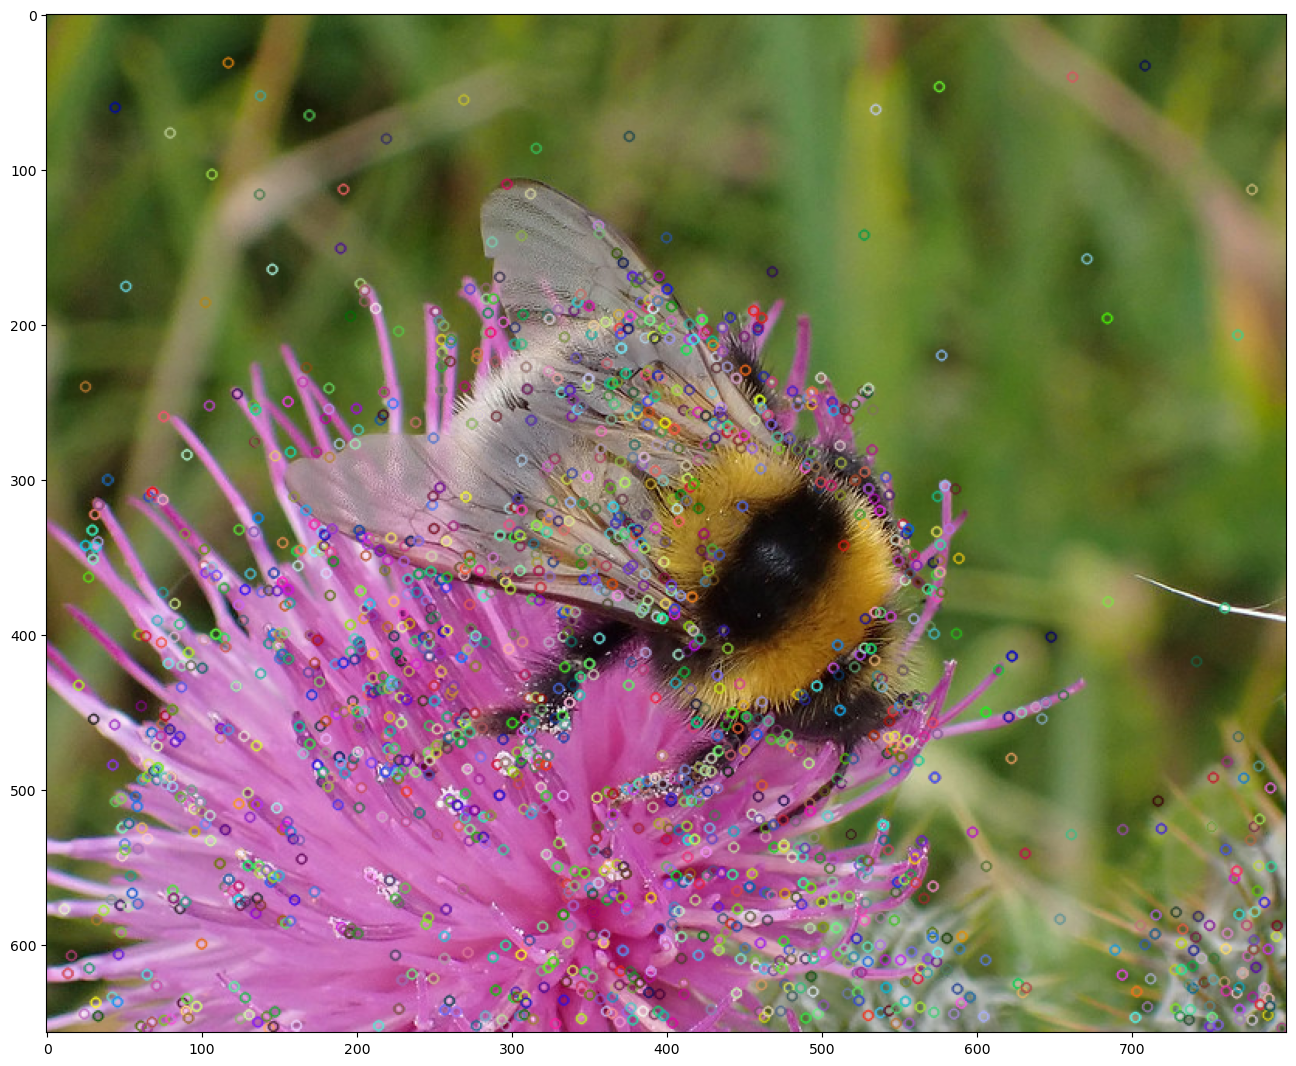

In [19]:
show_sift_features(img, img_kp)

# Deep learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
# os.chdir('bumblebee-test')
# if os.path.isdir('train/barbutellus') is False:
#     os.makedirs('train/barbutellus')
#     os.makedirs('train/bohemicus')
#     os.makedirs('train/campestris')
#     os.makedirs('train/cryptarum')
#     os.makedirs('train/distinguendus')
#     os.makedirs('train/hortorum')
#     os.makedirs('test/barbutellus')
#     os.makedirs('test/bohemicus')
#     os.makedirs('test/campestris')
#     os.makedirs('test/cryptarum')
#     os.makedirs('test/distinguendus')
#     os.makedirs('test/hortorum')
#     os.makedirs('validate/barbutellus')
#     os.makedirs('validate/bohemicus')
#     os.makedirs('validate/campestris')
#     os.makedirs('validate/cryptarum')
#     os.makedirs('validate/distinguendus')
#     os.makedirs('validate/hortorum')
    
#     for i in random.sample(glob.glob('*barbutellus*'), 20):
#         shutil.move(i, 'train/barbutellus')      
#     for i in random.sample(glob.glob('*bohemicus*'), 20):
#         shutil.move(i, 'train/bohemicus')
#     for i in random.sample(glob.glob('*campestris*'), 20):
#         shutil.move(i, 'train/campestris')
#     for i in random.sample(glob.glob('*cryptarum*'), 20):
#         shutil.move(i, 'train/cryptarum')
#     for i in random.sample(glob.glob('*distinguendus*'), 20):
#         shutil.move(i, 'train/distinguendus')
#     for i in random.sample(glob.glob('*hortorum*'), 20):
#         shutil.move(i, 'train/hortorum')
#     for i in random.sample(glob.glob('*barbutellus*'), 6):
#         shutil.move(i, 'validate/barbutellus')   
#     for i in random.sample(glob.glob('*bohemicus*'), 6):
#         shutil.move(i, 'validate/bohemicus')    
#     for i in random.sample(glob.glob('*campestris*'), 6):
#         shutil.move(i, 'validate/campestris') 
#     for i in random.sample(glob.glob('*cryptarum*'), 6):
#         shutil.move(i, 'validate/cryptarum') 
#     for i in random.sample(glob.glob('*distinguendus*'), 6):
#         shutil.move(i, 'validate/distinguendus') 
#     for i in random.sample(glob.glob('*hortorum*'), 6):
#         shutil.move(i, 'validate/hortorum') 
#     for i in random.sample(glob.glob('*barbutellus*'), 5):
#         shutil.move(i, 'test/barbutellus')      
#     for i in random.sample(glob.glob('*bohemicus*'), 5):
#         shutil.move(i, 'test/bohemicus')
#     for i in random.sample(glob.glob('*campestris*'), 5):
#         shutil.move(i, 'test/campestris')
#     for i in random.sample(glob.glob('*cryptarum*'), 5):
#         shutil.move(i, 'test/cryptarum')
#     for i in random.sample(glob.glob('*distinguendus*'), 5):
#         shutil.move(i, 'test/distinguendus')
#     for i in random.sample(glob.glob('*hortorum*'), 5):
#         shutil.move(i, 'test/hortorum')

# os.chdir('../../')

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

In [ ]:
train_path = 'bumblebee-test/train'
validate_path = 'bumblebee-test/validate'
test_path = 'bumblebee-test/test'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus', 'hortorum'], batch_size=10)
validate_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=validate_path, target_size=(224,224), classes=['barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus', 'hortorum'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus', 'hortorum'], batch_size=10, shuffle=False)

In [ ]:
imgs, labels = next(train_batches)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
plotImages(imgs)
print(labels)

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=6, activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=validate_batches,
    validation_steps=len(validate_batches),
    epochs=10,
    verbose=2
)

In [ ]:
test_imgs, test_labels = next(test_batches)

In [ ]:
plotImages(test_imgs)
print(test_labels)

In [ ]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [ ]:
import numpy as np
np.round(predictions)

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_batches.class_indices

In [ ]:
cm_plot_labels = ['barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus', 'hortorum']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')